In [1]:
from ididi import Visualizer, DependencyGraph

In [2]:
dg = DependencyGraph()

In [3]:
class ConfigService:
    def __init__(self, env: str = "test"):
        self.env = env


class DatabaseService:
    def __init__(self, config: ConfigService):
        self.config = config


class CacheService:
    def __init__(self, config: ConfigService):
        self.config = config


class BaseService:
    def __init__(self, db: DatabaseService):
        self.db = db


class AuthService(BaseService):
    def __init__(self, db: DatabaseService, cache: CacheService):
        super().__init__(db)
        self.cache = cache


class UserService:
    def __init__(self, auth: AuthService, db: DatabaseService):
        self.auth = auth
        self.db = db


class NotificationService:
    def __init__(self, config: ConfigService):
        self.config = config

#@dg.node
class EmailService:
    def __init__(self, notification: NotificationService, user: UserService):
        self.notification = notification
        self.user = user


In [5]:
dg.resolve(EmailService)

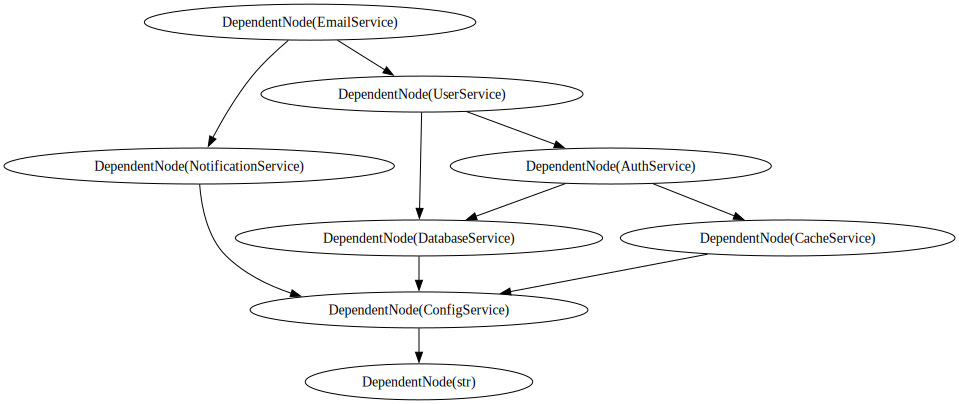

In [6]:
Visualizer(dg).view